In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
df_original = pd.read_csv("Service_Requests_From_2010.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df_original


,Unique Key,Created_Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,31-12-2015 23:59,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,31-12-2015 23:59,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,31-12-2015 23:59,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,31-12-2015 23:57,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,31-12-2015 23:56,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,29-03-2015 00:33,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,29-03-2015 00:33,29-03-2015 02:33,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,29-03-2015 00:33,29-03-2015 03:40,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,29-03-2015 00:33,29-03-2015 04:38,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [277]:
df = df_original[["Unique Key","Complaint Type","Descriptor","Location Type","Incident Zip","City","Status","Community Board","Borough","Park Borough","Latitude","Longitude"]]

In [262]:
df

,Unique Key,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Community Board,Borough,Park Borough,Latitude,Longitude
0,32310363,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501
1,32309934,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094
2,32309159,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,07 BRONX,BRONX,BRONX,40.870325,-73.888525
3,32305098,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,10 BRONX,BRONX,BRONX,40.835994,-73.828379
4,32306529,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,NaN,Open,0 Unspecified,Unspecified,Unspecified,NaN,NaN
300694,30281230,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,09 QUEENS,QUEENS,QUEENS,40.694077,-73.846087
300695,30283424,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,03 BROOKLYN,BROOKLYN,BROOKLYN,40.699590,-73.944234
300696,30280004,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,10 BRONX,BRONX,BRONX,40.837708,-73.834587


In [191]:
df = df.dropna()

In [192]:
df

,Unique Key,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Community Board,Borough,Park Borough,Latitude,Longitude
0,32310363,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,12 MANHATTAN,MANHATTAN,MANHATTAN,40.865682,-73.923501
1,32309934,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,01 QUEENS,QUEENS,QUEENS,40.775945,-73.915094
2,32309159,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,07 BRONX,BRONX,BRONX,40.870325,-73.888525
3,32305098,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,10 BRONX,BRONX,BRONX,40.835994,-73.828379
4,32306529,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,04 QUEENS,QUEENS,QUEENS,40.733060,-73.874170
...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,03 MANHATTAN,MANHATTAN,MANHATTAN,40.716053,-73.991378
300694,30281230,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,09 QUEENS,QUEENS,QUEENS,40.694077,-73.846087
300695,30283424,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,03 BROOKLYN,BROOKLYN,BROOKLYN,40.699590,-73.944234
300696,30280004,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,10 BRONX,BRONX,BRONX,40.837708,-73.834587


#### Checking unique data 

In [193]:
results = df.groupby("Latitude")

In [194]:
results.groups.keys()
print(len(results.groups.keys()))

123021


## Grouping according to Status

In [195]:
status_grp = df.groupby("Status")

In [196]:
status_grp.groups.keys()

dict_keys(['Assigned', 'Closed', 'Draft', 'Open'])

In [197]:
status=[]
count=[]
for Status, df2 in status_grp:
    print("{}:{}".format(Status,len(df2)))
    status.append(Status)
    count.append(len(df2))

Assigned:26
Closed:291107
Draft:1
Open:29


Text(0.5, 1.0, 'Case Status')

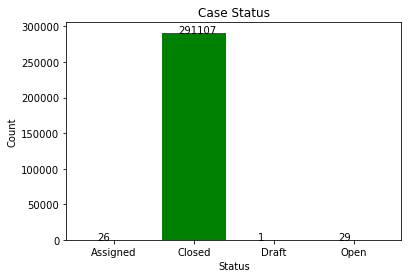

In [215]:
plt.bar(status,count, color=["red","green","yellow","blue"])
for index,data in enumerate(count):
    plt.text(x=index-0.2 , y =data+1, s=f"{data}" , fontdict=dict(fontsize=10))
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Case Status")

## Grouping according to cases in each city

In [199]:
city_grp = df.groupby("City")

In [200]:
city_grp.groups.keys()


dict_keys(['ARVERNE', 'ASTORIA', 'Astoria', 'BAYSIDE', 'BELLEROSE', 'BREEZY POINT', 'BRONX', 'BROOKLYN', 'CAMBRIA HEIGHTS', 'CENTRAL PARK', 'COLLEGE POINT', 'CORONA', 'EAST ELMHURST', 'ELMHURST', 'East Elmhurst', 'FAR ROCKAWAY', 'FLORAL PARK', 'FLUSHING', 'FOREST HILLS', 'FRESH MEADOWS', 'GLEN OAKS', 'HOLLIS', 'HOWARD BEACH', 'JACKSON HEIGHTS', 'JAMAICA', 'KEW GARDENS', 'LITTLE NECK', 'LONG ISLAND CITY', 'Long Island City', 'MASPETH', 'MIDDLE VILLAGE', 'NEW HYDE PARK', 'NEW YORK', 'OAKLAND GARDENS', 'OZONE PARK', 'QUEENS', 'QUEENS VILLAGE', 'REGO PARK', 'RICHMOND HILL', 'RIDGEWOOD', 'ROCKAWAY PARK', 'ROSEDALE', 'SAINT ALBANS', 'SOUTH OZONE PARK', 'SOUTH RICHMOND HILL', 'SPRINGFIELD GARDENS', 'STATEN ISLAND', 'SUNNYSIDE', 'WHITESTONE', 'WOODHAVEN', 'WOODSIDE', 'Woodside'])

In [201]:
city_name=[]
case_count=[]
for Status, df4 in city_grp:
    print("{}:{}".format(Status,len(df4)))
    city_name.append(Status)
    case_count.append(len(df4))

ARVERNE:214
ASTORIA:6254
Astoria:717
BAYSIDE:1214
BELLEROSE:369
BREEZY POINT:30
BRONX:40221
BROOKLYN:96870
CAMBRIA HEIGHTS:471
CENTRAL PARK:97
COLLEGE POINT:1216
CORONA:4265
EAST ELMHURST:2725
ELMHURST:2624
East Elmhurst:14
FAR ROCKAWAY:1163
FLORAL PARK:152
FLUSHING:5917
FOREST HILLS:1655
FRESH MEADOWS:1886
GLEN OAKS:304
HOLLIS:998
HOWARD BEACH:922
JACKSON HEIGHTS:1672
JAMAICA:7157
KEW GARDENS:763
LITTLE NECK:558
LONG ISLAND CITY:2409
Long Island City:134
MASPETH:2446
MIDDLE VILLAGE:1759
NEW HYDE PARK:96
NEW YORK:61957
OAKLAND GARDENS:546
OZONE PARK:2733
QUEENS:28
QUEENS VILLAGE:1788
REGO PARK:1477
RICHMOND HILL:1867
RIDGEWOOD:5125
ROCKAWAY PARK:738
ROSEDALE:913
SAINT ALBANS:825
SOUTH OZONE PARK:2165
SOUTH RICHMOND HILL:2759
SPRINGFIELD GARDENS:871
STATEN ISLAND:12216
SUNNYSIDE:708
WHITESTONE:1093
WOODHAVEN:2449
WOODSIDE:3493
Woodside:120


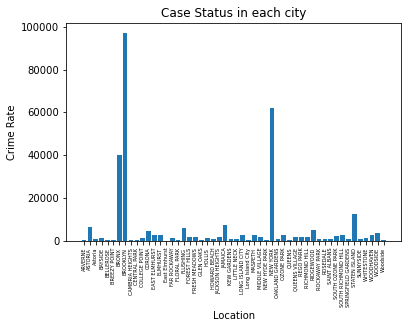

In [269]:
plt.bar(city_name,case_count)
plt.xlabel("Location")
plt.ylabel("Crime Rate")
plt.title("Case Status in each city")
plt.xticks(rotation = "vertical", fontsize=5)
plt.show()

## Counting different type of cases in each city

In [203]:
city = []
status_open = []
status_closed = []
status_assigned = []
status_draft = []

for Status, df3 in city_grp:
    city.append(Status)
    status_open.append(len(df3[df3["Status"] == "Open"]))
    status_closed.append(len(df3[df3["Status"] == "Closed"]))
    status_assigned.append(len(df3[df3["Status"] == "Assigned"]))
    status_draft.append(len(df3[df3["Status"] == "Draft"]))
    
print(status_closed)

[214, 6254, 716, 1214, 369, 30, 40216, 96858, 471, 97, 1216, 4265, 2724, 2624, 14, 1163, 152, 5916, 1655, 1886, 304, 998, 922, 1671, 7155, 763, 558, 2408, 134, 2445, 1759, 96, 61935, 546, 2733, 28, 1788, 1477, 1865, 5124, 738, 913, 825, 2165, 2759, 871, 12211, 708, 1093, 2448, 3493, 120]


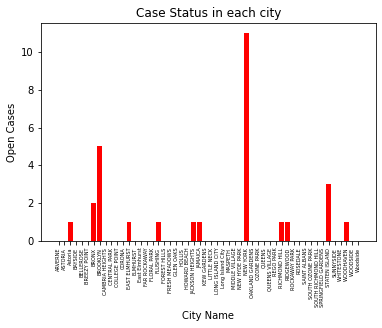

In [213]:
plt.bar(city,status_open,color="red")
plt.xlabel("City Name")
plt.ylabel("Open Cases")
plt.title("Case Status in each city")
plt.xticks(rotation = "vertical", fontsize=5)
plt.show()

## Finding areas in New York where there is highest crime rate

In [221]:
Latitude = df["Latitude"]
Longitude = df["Longitude"]

In [222]:
Longitude

0        -73.923501
1        -73.915094
2        -73.888525
3        -73.828379
4        -73.874170
            ...    
300692   -73.991378
300694   -73.846087
300695   -73.944234
300696   -73.834587
300697   -73.985922
Name: Longitude, Length: 291163, dtype: float64

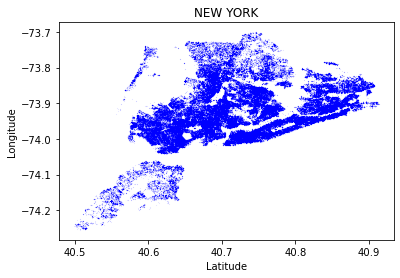

In [271]:
plt.scatter(Latitude, Longitude, s = 0.001, color = "blue")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("NEW YORK")
plt.show()

## Finding the type of complaint in each city
New York is taken as example here

In [233]:
complaint_grp = df.groupby("Complaint Type")

In [234]:
complaint_grp.groups.keys()

dict_keys(['Animal Abuse', 'Blocked Driveway', 'Derelict Vehicle', 'Disorderly Youth', 'Drinking', 'Graffiti', 'Illegal Parking', 'Noise - Commercial', 'Noise - House of Worship', 'Noise - Park', 'Noise - Street/Sidewalk', 'Noise - Vehicle', 'Posting Advertisement', 'Traffic', 'Vending'])

In [236]:
complaint_type = []
count = []

for comp_type, df5 in complaint_grp:
    complaint_type.append(comp_type)
    count.append(len(df5))
    


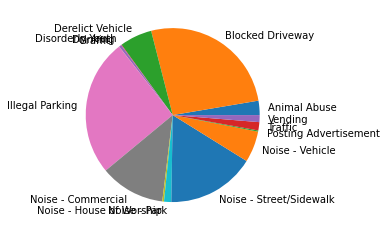

In [241]:
plt.pie(count, labels = complaint_type)
plt.show()

In [245]:
complaint_type_in_newyork = []
count1 = []

for complaint_type, df6 in complaint_grp:
    complaint_type_in_newyork.append(complaint_type)
    
    count1.append(len(df6[df6["City"] == "NEW YORK"]))
 

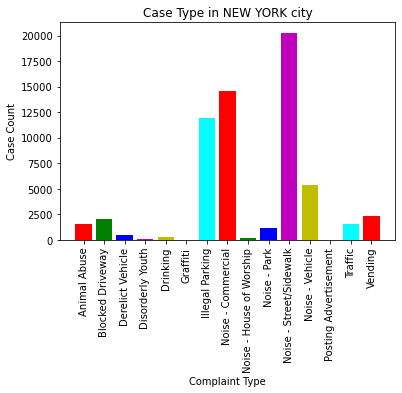

In [256]:
my_colors = ["r","g","b","m","y","black","cyan"]#'rgbkymc'
plt.bar(complaint_type_in_newyork, count1, color = my_colors)
plt.xlabel("Complaint Type")
plt.ylabel("Case Count")
plt.title("Case Type in NEW YORK city")
plt.xticks(rotation = "vertical", fontsize=10)
plt.show()

## Find which time in a day has highest crime rate

In [282]:
#Not getting how to fetch date and time from csv

df_original["Created_Date"] = df_original["Created_Date"].astype('datetime64[ns]')
print(df_original.Created_Date.dt.hour.head())

0    23
1    23
2    23
3    23
4    23
Name: Created_Date, dtype: int64


## Find which type of case take more time to get solved

In [7]:
df_time = df_original["Created_Date"]

In [8]:
df_time

0         31-12-2015 23:59
1         31-12-2015 23:59
2         31-12-2015 23:59
3         31-12-2015 23:57
4         31-12-2015 23:56
                ...       
300693    29-03-2015 00:33
300694    29-03-2015 00:33
300695    29-03-2015 00:33
300696    29-03-2015 00:33
300697    29-03-2015 00:33
Name: Created_Date, Length: 300698, dtype: object

In [9]:
time = []
for t in df_time:
    time.append(t.split()[1])
    
#print(time)
maximum = max(time)
print(maximum)
print(time.count(maximum))

23:59
291


In [10]:
unique_time = dict(Counter(time))

In [11]:
unique_time

{'23:59': 291,
 '23:57': 382,
 '23:56': 385,
 '23:55': 399,
 '23:54': 370,
 '23:53': 370,
 '23:52': 349,
 '23:50': 352,
 '23:48': 343,
 '23:47': 354,
 '23:44': 402,
 '23:40': 354,
 '23:38': 366,
 '23:34': 408,
 '23:32': 389,
 '23:31': 375,
 '23:30': 401,
 '23:26': 373,
 '23:25': 397,
 '23:22': 433,
 '23:21': 427,
 '23:19': 391,
 '23:18': 414,
 '23:16': 404,
 '23:15': 389,
 '23:13': 427,
 '23:12': 412,
 '23:11': 430,
 '23:10': 407,
 '23:09': 404,
 '23:08': 416,
 '23:07': 404,
 '23:06': 422,
 '23:05': 440,
 '23:03': 422,
 '22:58': 387,
 '22:57': 392,
 '22:56': 388,
 '22:53': 379,
 '22:52': 384,
 '22:50': 393,
 '22:48': 381,
 '22:47': 392,
 '22:46': 367,
 '22:45': 372,
 '22:44': 383,
 '22:43': 374,
 '22:41': 351,
 '22:40': 356,
 '22:38': 368,
 '22:37': 359,
 '22:35': 349,
 '22:34': 379,
 '22:33': 379,
 '22:32': 391,
 '22:30': 359,
 '22:29': 386,
 '22:28': 381,
 '22:27': 378,
 '22:26': 407,
 '22:25': 399,
 '22:24': 390,
 '22:21': 409,
 '22:20': 418,
 '22:18': 384,
 '22:17': 384,
 '22:15': 

In [38]:
time_frame = list(unique_time.keys())
cases_in_time = list(unique_time.values())
print(type(cases_in_time))
print(type(time_frame[1]))

<class 'list'>
<class 'str'>


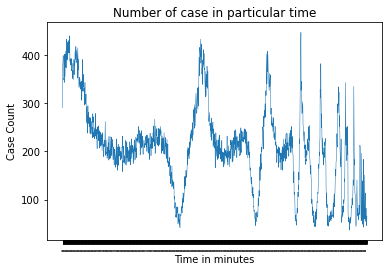

In [45]:
plt.plot(time_frame, cases_in_time, linewidth=0.5)
plt.xlabel("Time in minutes")
plt.ylabel("Case Count")
plt.title("Number of case in particular time")
plt.xticks(rotation = "vertical", fontsize=0.5)
plt.show()

## Find which hour in a day has highest crime rate

In [51]:
time_with_minutes = []
time_in_hour = []
for t in df_time:
    time_with_minutes.append(t.split()[1])
    
for t in time_with_minutes:
    time_in_hour.append(t.split(':')[0])
    
#print(time)
max_hour = max(time_in_hour)
print(max_hour)
print(time_in_hour.count(max_hour))

23
23331


In [56]:
unique_time_in_hour = dict(Counter(time_in_hour))

In [72]:
#Sort the time in ascending order
#print(sorted(unique_time_in_hour.items()))
unique_time_in_hour_sorted = dict(sorted(unique_time_in_hour.items()))
print(unique_time_in_hour_sorted)

{'00': 16989, '01': 11993, '02': 7438, '03': 4708, '04': 3661, '05': 3657, '06': 5925, '07': 9645, '08': 12691, '09': 13810, '10': 12932, '11': 12994, '12': 13019, '13': 11985, '14': 11524, '15': 11367, '16': 12087, '17': 12411, '18': 13498, '19': 14792, '20': 16761, '21': 20455, '22': 23025, '23': 23331}


In [73]:
time_frame_in_hour = list(unique_time_in_hour_sorted.keys())
cases_in_hour = list(unique_time_in_hour_sorted.values())
print(type(cases_in_hour))
print(type(time_frame_in_hour[1]))

<class 'list'>
<class 'str'>


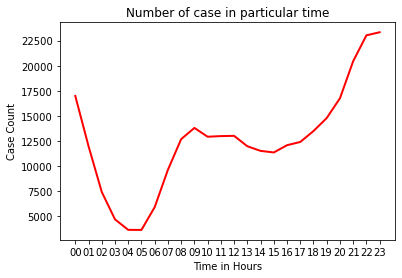

In [74]:
plt.plot(time_frame_in_hour, cases_in_hour, linewidth=2, color = "red")
plt.xlabel("Time in Hours")
plt.ylabel("Case Count")
plt.title("Number of case in particular time")
plt.xticks(rotation = "horizontal", fontsize=10)
plt.show()